In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# File to Load (Remember to Change These)
AAPL_ticker = Path("Stock_data/AAPL.csv")
AAPL_stock = pd.read_csv(AAPL_ticker)
AAPL_stock["Ticker"]= "AAPL"

AMZN_ticker = Path("Stock_data/AMZN.csv")
AMZN_stock = pd.read_csv(AMZN_ticker)
AMZN_stock["Ticker"]= "AMZN"

CSCO_ticker = Path("Stock_data/CSCO.csv")
CSCO_stock = pd.read_csv(CSCO_ticker)
CSCO_stock["Ticker"]= "CSCO"


EBAY_ticker = Path("Stock_data/EBAY.csv")
EBAY_stock = pd.read_csv(EBAY_ticker)
EBAY_stock["Ticker"]= "EBAY"

GOOG_ticker = Path("Stock_data/GOOG.csv")
GOOG_stock = pd.read_csv(GOOG_ticker)
GOOG_stock["Ticker"]= "GOOG"

IBM_ticker = Path("Stock_data/IBM.csv")
IBM_stock = pd.read_csv(IBM_ticker)
IBM_stock["Ticker"]= "IBM"

MSFT_ticker = Path("Stock_data/MSFT.csv")
MSFT_stock = pd.read_csv(MSFT_ticker)
MSFT_stock["Ticker"]= "MSFT"

NVDA_ticker = Path("Stock_data/NVDA.csv")
NVDA_stock = pd.read_csv(NVDA_ticker)
NVDA_stock["Ticker"]= "NVDA"

T_ticker = Path("Stock_data/T.csv")
T_stock = pd.read_csv(T_ticker)
T_stock["Ticker"]= "T"


TSLA_ticker = Path("Stock_data/TSLA.csv")
TSLA_stock = pd.read_csv(TSLA_ticker)
TSLA_stock["Ticker"]= "TSLA"

# student_data= Path("Resources/students_complete.csv")

ticker_list = ["AAPL","AMZN","CSCO","EBAY","GOOG","IBM","MSFT","NVDA","T","TSLA"]

In [3]:
#Combining all the Ticker data into a single DataFrame
stock_combined_df = pd.concat([AAPL_stock,AMZN_stock,CSCO_stock,EBAY_stock,GOOG_stock,IBM_stock,MSFT_stock,NVDA_stock,T_stock,TSLA_stock],ignore_index=True)

In [4]:
stock_combined_df.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
77615,06-12-2022,175.330002,181.220001,92150800,183.649994,179.820007,179.820007,TSLA
77616,07-12-2022,172.220001,175.029999,84213300,179.380005,174.039993,174.039993,TSLA
77617,08-12-2022,169.059998,172.199997,97624500,175.199997,173.440002,173.440002,TSLA
77618,09-12-2022,173.360001,173.839996,104746600,182.500000,179.050003,179.050003,TSLA
77619,12-12-2022,170.389999,176.100006,36780366,177.359894,172.190002,172.190002,TSLA


In [5]:
#Checking for NAs
stock_combined_df.isna().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
Ticker            0
dtype: int64

In [6]:
#Filtering the data based on the 10 year period
stock_combined_df['Date'] = pd.to_datetime(stock_combined_df['Date'], format='%d-%m-%Y')
start_date = '2010-12-31'
end_date = '2021-12-31'

stocks_filtered_df = stock_combined_df[(stock_combined_df['Date'] >= start_date) & (stock_combined_df['Date'] <= end_date)]

In [7]:
stocks_filtered_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
7582,2010-12-31,11.475357,11.533929,193508000,11.552857,11.520000,9.819854,AAPL
7583,2011-01-03,11.601429,11.630000,445138400,11.795000,11.770357,10.033260,AAPL
7584,2011-01-04,11.719643,11.872857,309080800,11.875000,11.831786,10.085627,AAPL
7585,2011-01-05,11.767857,11.769643,255519600,11.940714,11.928571,10.168128,AAPL
7586,2011-01-06,11.889286,11.954286,300428800,11.973214,11.918929,10.159904,AAPL
...,...,...,...,...,...,...,...,...
77377,2021-12-27,356.906677,357.890015,71145900,372.333344,364.646667,364.646667,TSLA
77378,2021-12-28,359.473328,369.829987,60324000,373.000000,362.823334,362.823334,TSLA
77379,2021-12-29,354.713318,366.213318,56154000,368.000000,362.063324,362.063324,TSLA
77380,2021-12-30,351.049988,353.776672,47040900,365.183319,356.779999,356.779999,TSLA


In [8]:
ticker_earnings_df = pd.read_csv('Stock_Earnings/Tickers_Earnings.csv')
ticker_earnings_df.head()

,symbol,date,qtr,eps_est,eps,release_time
0,A,2009-05-14,04/2009,NaN,NaN,post
1,A,2009-08-17,07/2009,NaN,NaN,post
2,A,2009-11-13,10/2009,NaN,NaN,pre
3,A,2010-02-12,01/2010,NaN,NaN,pre
4,A,2010-05-17,04/2010,NaN,NaN,post


In [28]:
ticker_earnings_df.isna().sum()
ticker_earnings_clean_df=ticker_earnings_df
#.dropna()
ticker_earnings_clean_df.isna().sum()

symbol              0
date                0
qtr              1004
eps_est         57256
eps             32387
release_time    60203
dtype: int64

In [29]:
ticker_earnings_clean_df['date'] = pd.to_datetime(ticker_earnings_clean_df['date'], format='%Y-%m-%d')
ticker_earnings_filtered_df = ticker_earnings_clean_df[(ticker_earnings_clean_df['date'] >= start_date) & (ticker_earnings_clean_df['date'] <= end_date)]
#ticker_earnings_filtered_df['Ticker'] = ticker_earnings_filtered_df['symbol']
ticker_earnings_filtered_df2=ticker_earnings_filtered_df.rename(columns={'symbol':'Ticker'})
ticker_earnings_filtered_df2.head()
# merge_df = ticker_earnings_filtered_df2.merge(stocks_filtered_df, how='inner', on='Ticker')
# merge_df.head()

,Ticker,date,qtr,eps_est,eps,release_time
7,A,2011-02-14,01/2011,NaN,NaN,post
8,A,2011-05-13,04/2011,NaN,NaN,NaN
9,A,2011-08-15,07/2011,NaN,NaN,post
10,A,2011-11-15,10/2011,NaN,NaN,post
11,A,2012-02-15,01/2012,NaN,NaN,post


In [32]:
#Getting the data we need for the tickers to be used
ticker_clean_master = pd.DataFrame(columns=['Ticker','date','qtr','eps_est','eps','release_time'])

for ticker in ticker_list:
    temp = ticker_earnings_filtered_df2[ticker_earnings_filtered_df2["Ticker"] == ticker]
    ticker_clean_master = pd.concat([ticker_clean_master, temp],ignore_index=True)
    
#ticker_clean_master.head()  
ticker_clean_master

/var/folders/lz/xyqjyj751ll_sgq50rjl0y580000gn/T/ipykernel_22453/3776266500.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ticker_clean_master = pd.concat([ticker_clean_master, temp],ignore_index=True)


,Ticker,date,qtr,eps_est,eps,release_time
0,AAPL,2011-01-18,12/2010,NaN,NaN,post
1,AAPL,2011-04-20,03/2011,NaN,NaN,post
2,AAPL,2011-07-19,06/2011,NaN,NaN,post
3,AAPL,2011-10-18,09/2011,NaN,NaN,post
4,AAPL,2012-01-24,12/2011,NaN,NaN,post
...,...,...,...,...,...,...
411,TSLA,2020-04-29,Q1,-0.357,1.24,NaN
412,TSLA,2020-07-22,Q2,0.032,2.18,NaN
413,TSLA,2020-10-21,Q3,0.569,0.76,NaN
414,TSLA,2021-01-27,Q4,1.032,0.80,post


In [33]:
ticker_clean_master.isna().sum()

Ticker           0
date             0
qtr              2
eps_est         84
eps             56
release_time    78
dtype: int64

In [39]:
#Do not Run, For testing only
#ticker_clean_master.to_csv('AAPL_EPS.csv', encoding='utf-8')

In [87]:
ticker_complete = pd.read_csv('Tickers_EPS.csv')
ticker_complete['date'] = pd.to_datetime(ticker_complete['date'], format='%m/%d/%y')
ticker_complete['Year'] = ticker_complete['date'].dt.to_period('y')
ticker_avg_year = ticker_complete.groupby(['Ticker','Year'])['eps'].mean()
ticker_avg_year = ticker_avg_year.to_frame()
ticker_avg_year = ticker_avg_year.reset_index()
ticker_avg_year

,Ticker,Year,eps
0,AAPL,2011,0.2475
1,AAPL,2012,0.6275
2,AAPL,2013,1.4150
3,AAPL,2014,1.6075
4,AAPL,2015,2.3000
...,...,...,...
104,TSLA,2017,-1.5675
105,TSLA,2018,-1.6375
106,TSLA,2019,-0.0575
107,TSLA,2020,1.5600


TypeError: float() argument must be a string or a real number, not 'Period'

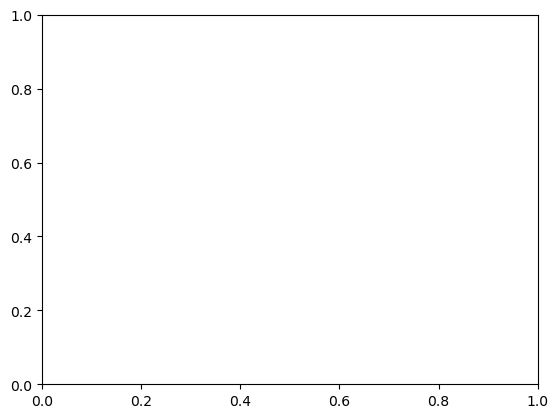

In [127]:
#Average EPS per ticker on the 10 years
ticker_eps_avg = pd.DataFrame(columns=['Ticker','Year','eps'])
for ticker in ticker_list:
    temp = ticker_avg_year[ticker_avg_year['Ticker'] == ticker]
    xvalues = temp['Year']
    yvalues = temp['eps']
    plt.scatter(xvalues, yvalues, label = ticker)
    #ticker_eps_avg = pd.concat([ticker_eps_avg, temp],ignore_index=True)
temp = ticker_avg_year[ticker_avg_year['Ticker'] == 'AAPL']
temp.plot(xlabel = 'year', ylabel='Earnings per Share' )
# temp2 = ticker_avg_year[ticker_avg_year['Ticker'] == 'TSLA']
# temp2.plot(xlabel='year')
